U1: (start) select x, y from XYData
Considering tuple (12.1, 1)
Considering tuple (16.3, 12.1)
Considering tuple (6.3, 22.1)
Considering tuple (12.3, 32.1)
Considering tuple (None, 25.1)
Dropped tuple  (None, 25.1)
xs: [12.1, 16.3, 6.3, 12.3]
ys: [1.0, 12.1, 22.1, 32.1]


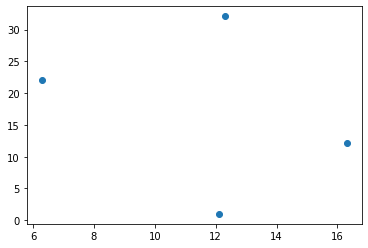

In [1]:
# %load figure.py
#!/usr/bin/python

import sqlite3
import matplotlib.pyplot as plt

connection1 = sqlite3.connect('mondial.db') # establish database connection
cursor1 = connection1.cursor() # create a database query cursor

# This scripts illustrates how you can use output from a query, cast it to python floats,
# and then use a figure plotting library called Matplotlib to create a scatterplot of the
# data.

# Make sure you have installed python as well as sqlite3 python libraries

# documentation of plotting library: https://matplotlib.org/, you can use any other
# library if you like

def drop():
    # delete the table XYData if it does already exist
    try:
        query = "DROP TABLE XYData";
        cursor1.execute(query)
        connection1.commit()  
        # by default in pgdb, all executed queries for connection 1 up to here form a transaction
        # we can also explicitly start tranaction by executing BEGIN TRANSACTION
    except sqlite3.Error as e:
        print("ROLLBACK: XYData table does not exists or other error.")
        print("Error message:", e.args[0])
        connection1.rollback()
        pass

def init():
    try:
        # Create table sales and add initial tuples
        query = "CREATE TABLE XYData(x decimal, y decimal)";
        cursor1.execute(query)
        query = """INSERT INTO XYData VALUES(12.1, 1.00)""";
        cursor1.execute(query)
        query = """INSERT INTO XYData VALUES(16.3, 12.1)""";
        cursor1.execute(query)
        query = """INSERT INTO XYData VALUES(6.3, 22.1)""";
        cursor1.execute(query)
        query = """INSERT INTO XYData VALUES(12.3, 32.1)""";
        cursor1.execute(query)
        query = """INSERT INTO XYData VALUES(NULL, 25.1)""";
        cursor1.execute(query)

        # this commits all executed queries forming a transaction up to this point
        connection1.commit()
    except sqlite3.Error as e:
        print("Error message:", e.args[0])
        connection1.rollback()

def query():
    # Here we test some concurrency issues.
    xy = "select x, y from XYData";
    print("U1: (start) "+ xy)
    try:
        cursor1.execute(xy)
        data = cursor1.fetchall()
        connection1.commit()
    except sqlite3.Error as e:
        print("Error message:", e.args[0])
        connection1.rollback()
        exit()

    xs= []
    ys= []
    for r in data:
        # you access ith component of row r with r[i], indexing starts with 0
        # check for null values represented as "None" in python before conversion and drop
        # row whenever NULL occurs
        print("Considering tuple", r)
        if (r[0]!=None and r[0]!=None):
            xs.append(float(r[0]))
            ys.append(float(r[1]))
        else:
            print("Dropped tuple ", r)
    print("xs:", xs)
    print("ys:", ys)
    return [xs, ys]

def close():
    connection1.close()
    


# when calling python filename.py the following functions will be executed:
drop()
init()
[xs, ys] = query()
plt.scatter(xs, ys)
plt.savefig("figure.png") # save figure as image in local directory
plt.show()  # display figure if you run this code locally, otherwise comment out

close()




1. Population Query
2. Raw yearly data population
3. Total city population by year
4. City population and prediction
5. linear prediction for all cities
6. Prediction population per year
7. Prediction vizualisation
8. Hypothesis
9. Exit
Choose: 8
Minimum latitude : 20
Maximum latitude : 50
Minimum longitude : 20
Maximum longitude : 50
[40.23, 38.79, 42.05, 29.51, 48.3, 23.73, 35.32, 38.28, 30.54, 43.05, 48.67, 34.03, 47.0, 47.82, 30.84, 40.74, 44.43, 29.92, 32.27, 31.22, 35.07, 45.82, 47.98, 35.78, 39.5, 31.16, 31.68, 43.13, 30.74, 31.23, 41.22, 32.65, 35.83, 35.93, 44.33, 46.27, 32.87, 30.68, 43.31, 39.02, 21.32, 49.69, 48.28, 41.12, 45.44, 36.57, 32.55, 34.65, 48.05, 32.9, 31.17, 40.35, 23.72, 27.85, 31.5, 27.92, 44.63, 26.92, 44.43, 23.58, 49.88, 27.53, 31.19, 31.08, 39.73, 41.13, 41.64, 35.51, 34.8, 20.07, 20.47, 30.12, 40.5, 31.61, 48.9, 26.67, 27.96, 25.62, 26.1, 32.28, 27.47, 29.05, 26.82, 21.09, 26.41, 23.6, 24.02, 46.58, 32.06, 25.93, 28.92, 23.58, 28.64, 34.95, 23.82, 30.47, 

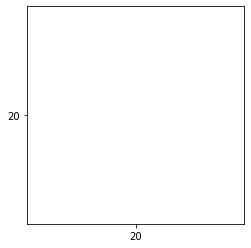

1. Population Query
2. Raw yearly data population
3. Total city population by year
4. City population and prediction
5. linear prediction for all cities
6. Prediction population per year
7. Prediction vizualisation
8. Hypothesis
9. Exit


In [ ]:
# %load menu.py
#!/usr/bin/python
import sqlite3
from sys import argv
import matplotlib.pyplot as plt

import numpy as np
from sklearn.linear_model import LinearRegression
    

# for Python 2.x users
try: input = raw_input
except NameError: pass

class Program:
    def __init__(self): #PG-connection setup
        self.conn = sqlite3.connect('mondial.db') # establish database connection
        self.cur = self.conn.cursor() # create a database query cursor

        # specify the command line menu here
        self.actions = [self.population_query, self.raw_data_population, self.total_city_population_by_year, self.city_population_and_prediction, self.linear_prediction_for_all_cities, self.prediction_per_year, self.population_prediction, self.hypothesis, self.exit]
        # menu text for each of the actions above
        self.menu = ["Population Query", "Raw yearly data population", "Total city population by year", "City population and prediction", "linear prediction for all cities", "Prediction population per year", "Prediction vizualisation", "Hypothesis", "Exit"]
        self.cur = self.conn.cursor()
    def print_menu(self):
        """Prints a menu of all functions this program offers.  Returns the numerical correspondant of the choice made."""
        for i,x in enumerate(self.menu):
            print("%i. %s"%(i+1,x))
        return self.get_int()
    def get_int(self):
        """Retrieves an integer from the user.
        If the user fails to submit an integer, it will reprompt until an integer is submitted."""
        while True:
            try:
                choice = int(input("Choose: "))
                if 1 <= choice <= len(self.menu):
                    return choice
                print("Invalid choice.")
            except (NameError,ValueError, TypeError,SyntaxError):
                print("That was not a number, genious.... :(")
 
    def population_query(self):
        minpop = input("min_population: ")
        maxpop = input("max_population: ")
        print("minpop: %s, maxpop: %s" % (minpop, maxpop))
        try:
            query ="SELECT * FROM city WHERE population >=%s AND population <= %s" % (minpop, maxpop)
            print("Will execute: ", query)
            result = self.cur.fetchall()
            self.cur.execute(query)
        except sqlite3.Error as e:
            print ("Error message:", e.args[0])
            connection1.rollback()
            exit()

        self.print_answer(result)

    def exit(self):    
        self.cur.close()
        self.conn.close()
        exit()
        
        
#------------------------------------------------------Solution------------------------------------------------------------
#------------------------------------------------------Question a----------------------------------------------------------
    def raw_data_population(self):
        xy = "select Year, Population from Citypops";
        print("Q1: (start) "+ xy)
        try:
            self.cur.execute(xy)
            data = self.cur.fetchall()
            self.conn.commit()
        except sqlite3.Error as e:
            print("Error message:", e.args[0])
            self.conn.rollback()
            exit()

        xs= []
        ys= []
        for r in data:
            # you access ith component of row r with r[i], indexing starts with 0
            # check for null values represented as "None" in python before conversion and drop
            # row whenever NULL occurs
            if (r[0]!=None and r[1]!=None):
                xs.append(int(r[0]))
                ys.append(int(r[1]))
            else:
                print("Dropped tuple ", r)
        plt.scatter(xs, ys)
        plt.title("City population raw data")
        plt.savefig("figure.png") # save figure as image in local directory
        plt.show()  # display figure if you run this code locally, otherwise comment out
       
    
#--------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------Question b----------------------------------------------------------
    def total_city_population_by_year(self):
        xy = "Select Year, sum(population) from Citypops group by Year";
        print("Q2: (start) "+ xy)
        try:
            self.cur.execute(xy)
            data = self.cur.fetchall()
            self.conn.commit()
        except sqlite3.Error as e:
            print("Error message:", e.args[0])
            self.conn.rollback()
            exit()

        xs= []
        ys= []
        for r in data:
            # you access ith component of row r with r[i], indexing starts with 0
            # check for null values represented as "None" in python before conversion and drop
            # row whenever NULL occurs
            if (r[0]!=None and r[1]!=None):
                xs.append(int(r[0]))
                ys.append(int(r[1]))
            else:
                print("Dropped tuple ", r)
        plt.scatter(xs, ys)
        plt.title("Total City population by year in database")
        plt.savefig("figure.png") # save figure as image in local directory
        plt.show()  # display figure if you run this code locally, otherwise comment out
        
    
#--------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------Question c----------------------------------------------------------

    def city_population_and_prediction(self):
        # ask for city country code and city name
        country_code, city_name = self.get_country_code_and_city_name()
        
        xy = f"Select Year, population from Citypops where Country='{country_code}' and city='{city_name}';"
        print("Q3: (start) "+ xy)
        try:
            self.cur.execute(xy)
            data = self.cur.fetchall()
            self.conn.commit()
        except sqlite3.Error as e:
            print("Error message:", e.args[0])
            self.conn.rollback()
            exit()

        xs= []
        ys= []
        for r in data:
            # you access ith component of row r with r[i], indexing starts with 0
            # check for null values represented as "None" in python before conversion and drop
            # row whenever NULL occurs
            if (r[0]!=None and r[1]!=None):
                xs.append(int(r[0]))
                ys.append(int(r[1]))
            else:
                print("Dropped tuple ", r)
                
      
        # predict the graph
        regr = LinearRegression().fit(np.array(xs).reshape([-1,1]), np.array(ys).reshape([-1,1]))
        score = regr.score(np.array(xs).reshape([-1,1]), np.array(ys).reshape([-1,1]))
        a = regr.coef_[0][0]
        b = regr.intercept_[0]
        
        x = np.linspace(xs[0], 2030, 250000)
        y = a*x+b
        
        plt.scatter(xs, ys)
        plt.plot(x, y, '-r')
        plt.title(f"City population and prediction for: {city_name} a= {a}, b={b}, score={score}")
        plt.savefig("figure.png") # save figure as image in local directory
        plt.show()  # display figure if you run this code locally, otherwise comment out
        
        
    def get_country_code_and_city_name(self):
        """Retrieves inputs from the user.
        If the user fails to submit an integer, it will reprompt until an integer is submitted."""
        while True:
            try:
                country_code = input("country code: ")
                
                while True:
                    try:
                        city_name = input("city name: ")
                        return country_code, city_name
                    except (NameError,ValueError, TypeError,SyntaxError):
                        print("That was not a number, genious.... :(") 
                        
            except (NameError,ValueError, TypeError,SyntaxError):
                print("That was not a number, genious.... :(")        

      
    
#--------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------Question d----------------------------------------------------------

    def linear_prediction_for_all_cities(self):
        try:
            # create second cursor
            second_conn = sqlite3.connect('mondial.db')
            second_cur = second_conn.cursor()

            # drop table and create table with the correct columns
            drop_table = "Drop table if exists linearprediction;"

            create_table = "CREATE TABLE IF NOT EXISTS linearprediction (name VARCHAR2(50) NOT NULL, country VARCHAR2(4) NOT NULL, a REAL NOT NULL, b REAL NOT NULL, score REAL NOT NULL);"

            print("Q4: (start) "+ drop_table)
            print(create_table)

            self.cur.execute(drop_table)
            self.cur.execute(create_table)
            
            # loop over the city query
            city_iterator = "Select distinct city, country from citypops;"

            self.cur.execute(city_iterator)
            city = self.cur.fetchone()
            
            self.conn.commit()

            while(city != None):

                if (city[0]!=None and city[1]!=None):

                    select_data = "Select year, population from citypops where city = :city and country = :country"
                    second_cur.execute(select_data, {"city": str(city[0]), "country": str(city[1])})
                    data = second_cur.fetchall()
                    
                    # extract the data
                    xs= []
                    ys= []
                    for r in data:
                        # you access ith component of row r with r[i], indexing starts with 0
                        # check for null values represented as "None" in python before conversion and drop
                        # row whenever NULL occurs
                        if (r[0]!=None and r[1]!=None):
                            xs.append(int(r[0]))
                            ys.append(int(r[1]))
                        else:
                            print("Dropped tuple ", r)

                    # predict the graph
                    if(len(xs) > 1 and len(ys) > 1):
                        regr = LinearRegression().fit(np.array(xs).reshape([-1,1]), np.array(ys).reshape([-1,1]))
                        score = regr.score(np.array(xs).reshape([-1,1]), np.array(ys).reshape([-1,1]))
                        a = regr.coef_[0][0]
                        b = regr.intercept_[0]

                        if (score <= 1 and score >= 0):
                            second_cur.execute("insert into linearPrediction values (:name, :country, :a, :b, :score)",
                                                {"name": str(city[0]), "country": str(city[1]), "a": str(a), "b": str(b),
                                                     "score": str(score)})
                    

                    city = self.cur.fetchone()
                    self.conn.commit()
                else:
                    print("Dropped tuple ", r)
                    city = self.cur.fetchone()
                    self.conn.commit()


            second_conn.commit()
            # show the new relation
            self.cur.execute("Select * from linearPrediction")
            result = self.cur.fetchall()
            self.conn.commit()
            
#            self.print_answer(result)
                
        except sqlite3.Error as e:
            print("Error message:", e.args[0])
            self.conn.rollback()
            second_conn.rollback()
            exit()

#--------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------question e----------------------------------------------------

    def prediction_per_year(self):
        try:
            # drop table and create table with the correct columns
            drop_table = "Drop table if exists prediction;"

            create_table = "CREATE TABLE IF NOT EXISTS prediction (name VARCHAR2(50) NOT NULL, country VARCHAR2(4) NOT NULL, population INT NOT NULL, year INT NOT NULL);"

            print("Q4: (start) "+ drop_table)
            print(create_table)

            self.cur.execute(drop_table)
            self.cur.execute(create_table)
            self.conn.commit()

            # create the table linear prediction
            self.linear_prediction_for_all_cities()

            # iterate over the years
            for year in range(1950, 2051):
                self.cur.execute("INSERT INTO prediction (name, country, population, year) SELECT name, country, a * :year + b AS population, :year AS year FROM linearprediction",
                                                {"year": str(year)})

            self.conn.commit()

            self.cur.execute("SELECT * FROM prediction")
            result = self.cur.fetchall()
            self.conn.commit()


        except sqlite3.Error as e:
            print("Error message:", e.args[0])
            self.conn.rollback()
            exit()
#--------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------question f----------------------------------------------------

    def population_prediction(self):
        try:
            # query for prediction
            self.prediction_per_year()
            
            country = input("Country: ")
            city = input("City: ")
            
            self.cur.execute("Select year, population FROM prediction where name like :city and country like :country", {"country": country, "city": city})
            data = self.cur.fetchall()
            self.conn.commit()

            # query for evg and max population
            self.cur.execute("SELECT AVG(population), MAX(population) FROM prediction WHERE name like :city and country like :country", {"country": country, "city": city})
            avg_max = self.cur.fetchall()
            self.conn.commit()
            
            avg_population = avg_max[0][0]
            max_population = avg_max[0][1]

            #  uses our new prediction table to visualize the population trends for all cities and years as a scatter plot
            title = f"Population trends for {city} in {country} with predicted mean of {avg_population} and predicted maximum population {max_population} "
            
                        
            xs = []
            ys = []
            for r in data:
                if (r[0] != None and r[1] != None):
                    xs.append(int(r[0]))
                    ys.append(int(r[1]))

            plt.scatter(xs, ys)
            plt.title(title)
            plt.show()


        except sqlite3.Error as e:
            print("Error message:", e.args[0])
            exit()

#--------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------question g---------------------------------------------------
    
    # You could ask if there are correlations between (longitude, latitude) position of a city and population growth.
    def hypothesis(self):
        try:
             
            query = "CREATE VIEW IF NOT EXISTS Popdata AS SELECT Year year, city name, citypops.population population, citypops.country country, longitude longitude, latitude latitude, elevation elevation, agriculture agriculture, service service, industry industry, inflation inflation FROM Citypops JOIN city ON citypops.city = city.name AND citypops.country = city.country AND citypops.province = city.province JOIN Economy ON citypops.country = economy.country;"

            self.cur.execute(query)
            self.conn.commit()
            
            min_latitude = input("Minimum latitude : ")
            max_latitude = input("Maximum latitude : ")
            
            min_longitude = input("Minimum longitude : ")
            max_longitude = input("Maximum longitude : ")

            query = ("Select longitude, latitude, AVG(population) FROM Popdata WHERE Latitude > :min_latitude "+
                            "and latitude < :max_latitude " +
                            "and longitude > :min_longitude " + 
                            "and longitude < :max_longitude group by name")
                        
            data = self.cur.execute(query, {"min_latitude": min_latitude, "max_latitude": max_latitude, "min_longitude": min_longitude, "max_longitude": max_longitude})
            self.conn.commit()

            xs = []
            ys = []
            zs = []
            for r in data:
                if (r[0] != None and r[1] != None and r[2] != None):
                    xs.append(float(r[0]))
                    ys.append(float(r[1]))
                    zs.append(float(np.log(r[2])))

     
            print(xs)
            print(ys)
            print(zs)

            plt.scatter(xs, ys, c=zs, s = 2)
            plt.xlim([min_longitude, max_longitude])
            plt.ylim([min_latitude, max_latitude])
            plt.axis('scaled')
            plt.show()

        except sqlite3.Error as e:
            print("Error message:", e.args[0])
            self.conn.rollback()
            exit()

#--------------------------------------------------------------------------------------------------------------------------
        
    def print_answer(self, result):
        print("-----------------------------------")
        for r in result:
            print(r)
        print("-----------------------------------")

    def run(self):
        while True:
            try:
                self.actions[self.print_menu()-1]()
            except IndexError:
                print("Bad choice")
                continue

if __name__ == "__main__":
    db = Program()
    db.run()
